# Using Machine Learning Tools 2020
# Assignment 3: Deep Neural Networks

## Overview

In this assignment you will implement two types of deep learning network (fully connected and convolutional neural networks) to classify images of hands in poses corresponding to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train two different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore different cases of over-fitting and under-fitting, and know what appropriate actions to take in these cases.
 

It is the intention that this assignment will take you through the process of implementing optimised deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, and optimize performance. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General Instructions 

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, as indicated in this template.
 - Your code must use the current stable versions of python libraries, not outdated versions.
 - All data processing must be done within the notebook after loading the data.
 - Comment your code, so that its purpose is clear to the reader.
 - **Before submitting your notebook, make sure to run all cells in your final notebook so that it works correctly.**

This assignment is divided into several tasks. Stick to this notebook format, although feel free to add cells throughout, but keep the same numbering for all instructions, questions and answers.

Make sure to answer every question with *separate answer text (“Answer: ...”) in a cell* and check that you answered all sub-questions/aspects within the question. The text answers are worth points.

Make the *figures self-explanatory and unambiguous*. Always include axis labels, if available with units, unique colours and markers for each curve/type of data, a legend and a title. Give every figure a number (e.g. at start of title), so that it can be referred to from different parts of the text/notebook. This is also worth points!

## Outline

The main steps in the assignment are outlined here, so that you can appreciate the bigger picture. Some of the steps are purely for testing your knowledge and demonstrating certain things, but in general it outlines the main process that you would go through to solve a practical problem.

- To start with we load the data, visualise and explore it. You should always do this in any problem.

- After this we will establish how long a simple network takes to run on a given amount of training data on your computer. This is important for this assignment as you have to run on your own machines, and we need to make sure it runs in a reasonable amount of time. In a practical problem you are likely to have a lot more data and will use bigger networks, but it is common that you will have a limit on the available resources and time, so establishing a baseline timing and deciding on constraints is a very common task in any problem.

- Following this we will go through a few specific cases, looking at some extremes and learning to identify common problems, how to spot them and options for how to correct for them.

- Afterwards, the main bulk of the assignment will focus on tuning the networks to give the best performance. This is something you will need to do systematically, and demonstrates the approach that you would take in any practical problem. Some limitations will be given, in order to help you in this assignment, but it should be clear how to extrapolate these to a more general setting for other datasets and tasks.

- Once the optimal network is found, the performance will be evaluated.

- A free choice element at the end will allow you to explore one extra aspect, beyond the limitations imposed above.


Feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

## Your Details

Name: The Trung Le 

ID: a1784927


## Initialise environment

In [1]:
# Load libraries, etc.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Add other libraries here

In [2]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import time
from sklearn.metrics import confusion_matrix

---

## 1. Explore the Dataset (10%)

### 1.1 Load the data
 - We will use an MNIST-style dataset of sign language signals (hands), which are all small images (28x28)
 - Files are sign_mnist_train.csv and sign_mnist_test.csv
 - Split up labels and images
 - Reshape images appropriately

In [4]:
sign_train = pd.read_csv('sign_mnist_train.csv')
sign_test = pd.read_csv('sign_mnist_test.csv')
x_train = sign_train.drop(['label'], axis=1).values
y_train = sign_train['label'].copy()
x_test = sign_test.drop(['label'], axis=1).values
y_test = sign_test['label'].copy()
number_train_sample = x_train.shape[0]

In [5]:
x_train_reshape = []
for i in range (0, number_train_sample):
    x_train_reshape.append(x_train[i,:].reshape(28,28))   

### 1.2 Look at the data
- Print out some descriptive information about the dataset
- Show one example image of each class

In [6]:
sign_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [7]:
sign_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [8]:
print("Name of label of training set is:")
print(np.unique(y_train))
print("Name of label of test set is:")
print(np.unique(y_test))

Name of label of training set is:
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Name of label of test set is:
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


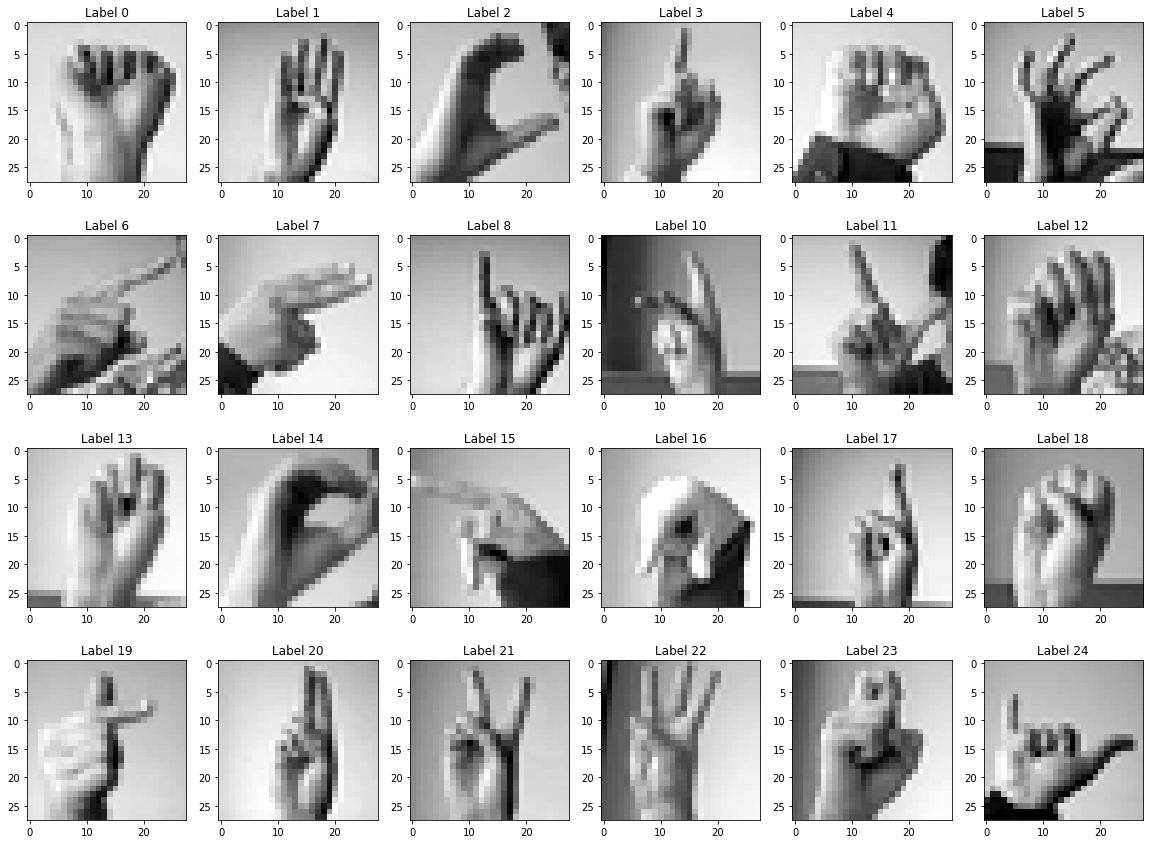

In [9]:
label_ID = []
for a in range (0,25):
    check = False
    for b in range (0, number_train_sample):
        if (y_train[b] == a):
            label_ID.append(b)
            check = True
            break
    if (check == False):
        label_ID.append(-1)

fig, ax = plt.subplots(4,6,figsize = (20,15))
m = 0
n = 0
for i in range (0,25):
    if (label_ID[i] != -1):
        ax[m,n].imshow(x_train_reshape[label_ID[i]], cmap = 'gray')
        ax[m,n].grid(False)
        ax[m,n].set_title("Label %d" % i)
        if(n == 5):
            m = m + 1
            n = 0
        else:
            n = n + 1
plt.show()

Answer: 

There are 27455 samples in training set and 7172 samples in test set. 

In each sample, there is 1 label and there are 784 pixels that represented a 28x28 image.

The names of the label are from 0 to 8 and from 10 to 24.

The 24 images above are 24 examples of 24 labels in the dataset.

### Question 1.3
- Which pair of classes do you think will be the most difficult to distinguish?  Give a reason for your answer.

The pair of classes that will be the most difficult to distinguish is label 13 and label 18.

The reason for that is the sign having label 13 has similar sharp and similar texture with the sign having label 18.

### 1.4 Look at the labels
- Look at the distribution of the labels
- Adjust for anything that could cause problems later on

Text(0.5, 1.0, 'Distribution of labels of training set')

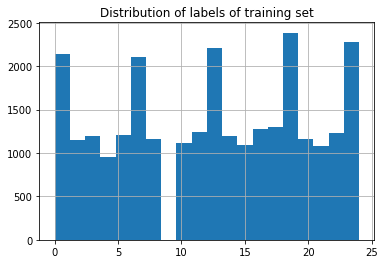

In [10]:
y_train.hist(bins = 20, )
plt.title("Distribution of labels of training set")

Text(0.5, 1.0, 'Distribution of labels of test set')

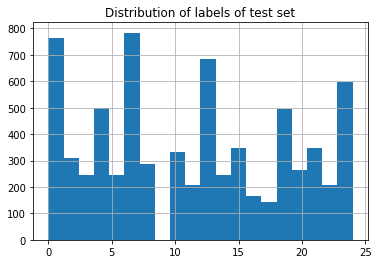

In [11]:
y_test.hist(bins = 20)
plt.title("Distribution of labels of test set")

### 1.5 Split the data (test, validation and training) and scale it
- We will only take the first 2500 training images (which is still over 100 per class) in order to keep run-times down and to make training more challenging. In a practical situation you might either have less data than you'd like or limitations on how much can be processed, so this also reflects a common real-life constraint.
- In this case we will create both the validation and test sets from the testing dataset.  It is unusual to do this, but in this case the training set contains a lot of non-independent, augmented images and it is important that the validation images must be independent. 
- Take 1000 images each for the validation and test sets.
- Scale the data appropriately (e.g. as done for other MNIST datasets).

Answer: Take 2500 training images from training set, 1000 validation images and 1000 test images from test set

In [12]:
train_set = sign_train[2000:4500]
validation_set = sign_test[1000:2000]
test_set = sign_test[3500:4500]

In [13]:
X_train = train_set.drop(['label'], axis=1).values
X_val = validation_set.drop(['label'], axis=1).values
X_test = test_set.drop(['label'], axis=1).values

Answer: The maximum value for each pixel is 255. Hence the data is scaled by divided to 255 to make the maximum value of each pixel becomes 1.

In [14]:
X_train_model = X_train / 255
X_val_model = X_val / 255
X_test_model = X_test / 255

Answer: Reshape the data to (28 x 28) size images.

In [15]:
X_train_model = X_train_model.reshape((-1, 28, 28, 1))
X_val_model = X_val_model.reshape((-1, 28, 28, 1))
X_test_model = X_test_model.reshape((-1, 28, 28, 1))

### 1.6 Look at label distribution
- Check the label distribution in all three sets and if there are problems, change the selection above.

In [16]:
Y_train = train_set['label'].copy()
Y_val = validation_set['label'].copy()
Y_test = test_set['label'].copy()

Text(0.5, 1.0, 'Distribution of labels of training set after spliting')

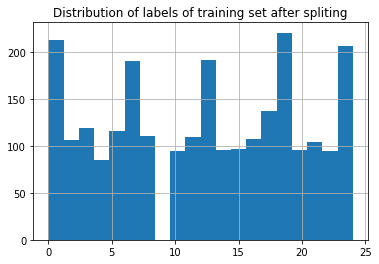

In [17]:
Y_train.hist(bins = 20)
plt.title("Distribution of labels of training set after spliting")

Text(0.5, 1.0, 'Distribution of labels of validation set after spliting')

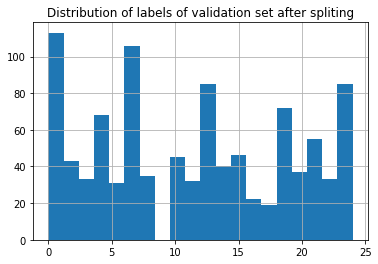

In [18]:
Y_val.hist(bins = 20)
plt.title("Distribution of labels of validation set after spliting")

Text(0.5, 1.0, 'Distribution of labels of test set after spliting')

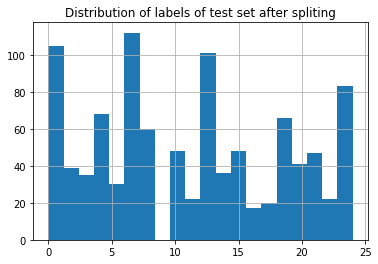

In [19]:
Y_test.hist(bins = 20)
plt.title("Distribution of labels of test set after spliting")

Answer: Because the labels of the dataset is non-continous, I change the labels [10,24] to [9,23] to make the labels of the dataset become continous from 0 to 23.

In [20]:
Y_train_model = Y_train.values
Y_test_model = Y_test.values
Y_val_model = Y_val.values

for i in range (0,2500):
    if (Y_train_model[i] > 9):
        Y_train_model[i] = Y_train_model[i] - 1
        
for i in range (0,1000):
    if (Y_test_model[i] > 9):
        Y_test_model[i] = Y_test_model[i] - 1
        
for i in range (0,1000):
    if (Y_val_model[i] > 9):
        Y_val_model[i] = Y_val_model[i] - 1

***

## 2. Initial Deep Learning Networks (30%)

In this section you will look at a variety of networks with this data and explore various settings and outcomes.

### Question 2.1
 - We will treat this as a classification problem but we could formulate it as a regression problem instead (predicting the label values as the outcomes). Name one disadvantage that a regression approach would have.

The dataset has 24 different integer outcomes - these are 24 labels from 0 to 23. However, the regression approach use the features (784 pixels) to predict the outcomes. Hence, the predicted outcomes can be non-integer values, which do not suitable with the actual outcomes.

### Question 2.2
 - What is chance level accuracy (e.g. if predictions were completely random) in this case?

Answer: There are total 24 different labels in the original data set (from 0 to 8 and from 10 to 24). Hence, the accuracy of predictions that were completely random is 1/24 = 4.17%.

### 2.3 Timing Test
 - We will start to work out how long it takes to train a moderately sized network on your machine
 - Build a convolutional neural network (CNN) with the following specifications:
   - All filter (kernel) sizes are 3x3
   - Initial Conv2D layer with 64 filters
   - MaxPooling layer following this
   - Second Conv2D layer with 128 filters
   - Dense output layer after this
 - Set the number of epochs to **20** this time (we will use early stopping methods later but **not** now)
 - Set the batch size to 50
 - Use the *Adam* optimiser, with its default learning rate (we will use the Adam optimiser throughout this assignment)
 - Use the *ELU* activation function for the hidden layers (this will be used throughout)
 - Training/Validation/Testing set sizes are 2500/1000/1000, as described above
 - Use time.time() to determine how long it takes to train your network
 - Plot your learning curves (loss functions and accuracies for training and validation)
 - Calculate the accuracies of the network on both the validation and test datasets
 
If this run takes less than 10 minutes then continue with these settings. If it takes much longer than 10 minutes then reduce the number of training points until it is close to 10 minutes. In the case that you cannot achieve this without reducing the number of training points to less than 250, please contact a course organiser, as you may need to use alternative computational resources.

In [21]:
n_train = 2500
n_valid = 1000

hiddensizes = [64, 128]

actfn = "elu"

optimizer = keras.optimizers.Adam
learningrate = 0.01

batch_size = 50
n_epochs = 20

In [22]:
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters = hiddensizes[0], kernel_size = (3,3), strides = 1, activation = actfn, padding = "same", 
                                  input_shape = [28, 28, 1]))    
    model.add(keras.layers.MaxPooling2D(pool_size = 2))          
    model.add(keras.layers.Conv2D(filters = hiddensizes[1], kernel_size = (3,3), strides = 1, activation = actfn, padding = "same")) 
    model.add(keras.layers.Flatten())                          
    model.add(keras.layers.Dense(24, activation = "softmax")) 
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(lr=learningrate), metrics=["accuracy"])   
    return model

In [23]:
def do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size):
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train_model, Y_train_model, batch_size = batch_size, epochs = n_epochs,
                        validation_data = (X_val_model, Y_val_model))
    max_val_acc = np.max(history.history['val_accuracy'])
    testres = model.evaluate(X_test_model, Y_test_model, verbose = 0)
    return (max_val_acc, testres[1], history, model)

In [24]:
start = time.time()
valacc, testacc, history, model = do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
print ("Running time: %0.2f minutes" %((time.time() - start)/60.0))

Train on 2500 samples, validate on 1000 samples
Epoch 1/20
2500/2500 [==============================] - 7s 3ms/sample - loss: 20.6840 - accuracy: 0.0668 - val_loss: 7.2622 - val_accuracy: 0.1230
Epoch 2/20
2500/2500 [==============================] - 6s 3ms/sample - loss: 5.0653 - accuracy: 0.2876 - val_loss: 2.2144 - val_accuracy: 0.4940
Epoch 3/20
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.9992 - accuracy: 0.6992 - val_loss: 1.2269 - val_accuracy: 0.6180
Epoch 4/20
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.5065 - accuracy: 0.8452 - val_loss: 0.9765 - val_accuracy: 0.7090
Epoch 5/20
2500/2500 [==============================] - 6s 3ms/sample - loss: 0.3473 - accuracy: 0.8960 - val_loss: 0.9328 - val_accuracy: 0.7230
Epoch 6/20
2500/2500 [==============================] - 6s 3ms/sample - loss: 0.2356 - accuracy: 0.9336 - val_loss: 0.9870 - val_accuracy: 0.7200
Epoch 7/20
2500/2500 [==============================] - 6s 3ms/sample - los

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 24)                602136    
Total params: 676,632
Trainable params: 676,632
Non-trainable params: 0
_________________________________________________________________


### 2.4 Initial Network Exploration
- We will now look at a couple of imperfect cases to get a feeling for what happens in different training situations

### Question 2.5
 - In the following plots, from a network that is being trained, which of the following is demonstrated: (a) under-fitting, (b) over-fitting, (c) unstable/noisy fitting, or (d) not converged? Combinations of these are also possible. Give a reason for your answer.

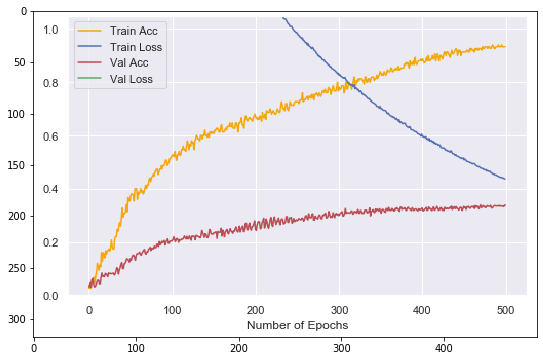

In [26]:
im = plt.imread('LearningPlot1.png')
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

Answer: From plot 1, the network is over-fitting, noisy fitting and not converged. The reasons are:
+ over-fitting: the training accuracy is high but the validation accuracy is low.
+ noisy fitting: the training and validation accuracy lines have many zigzag, that zigzag represented the noisy.
+ not converged: thetraining accuracy and validation accuracy lines are not converged.

### Question 2.6
 - In the following plots, from a network that is being trained, which of the following is demonstrated: (a) under-fitting, (b) over-fitting, (c) unstable/noisy fitting, or (d) not converged? Combinations of these are also possible. Give a reason for your answer.

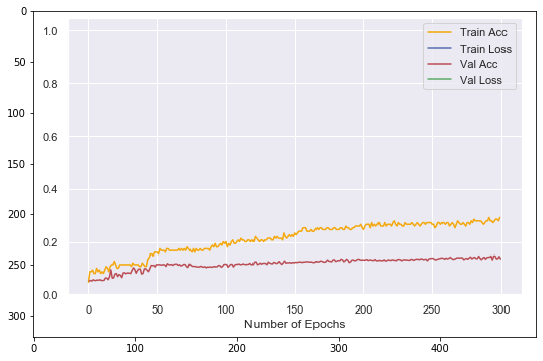

In [27]:
im = plt.imread('LearningPlot2.png')
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

Answer: From plot 2, the network is under-fitting and noisy fitting. The reasons are:
+ under-fitting: both the training accuracy and the validation accuracy are low.
+ noisy fitting: the training and validation accuracy lines have many zigzag, that zigzag represented the noisy.

### Question 2.7
 - Name something that you could do to alleviate problems due to (a) overfitting and (b) underfitting. Provide separate answers for (a) and (b).

Answer: 

To solve the overfitting problem, I will:
+ Use cross-validation.
+ Use early stopping.
+ Reduce the number of epochs.

To solve the underfitting problem, I will:
+ Increase the number of layers.
+ Increase the size of training data.

***

## 3. Main Network Optimisation (50%)

In this section you will undertake the main task of going through the process to find a deep learning solution to this problem that is (within limits) optimised to this specific case.

The following settings for the networks will be fixed:
 - Batch size of 50
 - Maximum number of epochs of 100, but implement *early stopping*
 - Use the *Adam* optimiser
 - Use the *ELU* activation function for all hidden layers (although ReLU is very common, we will explore ELU for this assignment)
 - Use the He Uniform initialization for weights (pass *kernel_initializer="he_uniform"* into the layer specifications)
 - Training/Validation/Testing set sizes are 2500/1000/1000 as described above (with the validation set derived from the original test dataset) unless you needed to reduce the training set size based on your timing tests

You will investigate **both** fully connected and CNN architectures, with the following possibilities:
 - **Number of hidden or Conv2D layers** can be **1, 2 or 3**, but no more (this does *not* count the final dense layer in a CNN)
 - **Number of hidden nodes** (fully connected network) or **number of filters** (in a Conv2D layer of a CNN) can be: **32, 64, 128 or 256** (no other values can be used)
 - A constant **learning rate** should be used (no varying schedules) where the value can be adjusted to be **0.1, 1.0, 10.0 and 100.0** **times the default rate** (these are the only values you can use)
 - CNN architectures will always follow the pattern of Conv2D followed immediately by MaxPooling, with the dense layer following the final Conv2D: e.g. C2-D or C2-MP-C2-D or C2-MP-C2-MP-C2-D (where C2=Conv2D, MP=MaxPooling and D=dense) - note that this is the same pattern used in the code from workshops 8, 9 and 10

Note that the patience setting in the early stopping can be adjusted, but is not considered a "parameter" as such.

A fixed training/validation/test split will be used throughout.

The objective is for you to go through a systematic process for finding a good network that could be adapted to work for other problems. It is the process, rather than the final results, that are more important here (it is not a competition based on results, but an exercise in learning how to approach such problems in a good way). So clearly explain your process, document your code and show appropriate results as you go. In particular, make a summary at the end, in a separate cell, of all the learning rate curves and any other key pieces of information that you used for comparing models and parameter settings.

Remember that the following exploration options exist:
 - Random search through parameter space (noting that here most of the "parameters" are ones that specify the network architecture)
 - Grid search
 - Individual parameter sweeps (varying only one parameter whilst keeping others fixed)
 - These can also be combined together and/or iterated
 
Before writing any code, answer the following two questions and, after that, design and implement your optimisation process to select the "best" network.

### Question 3.1
- What approach will you take to this optimisation?  Summarise your main strategy (or strategies) in a few lines here, pointing out any major advantages or disadvantages.

First, I apply all models with CNN architectures and different parameters that follow the requirements of the question 3.
Second, I apply all models with fully connected architectures and different parameters that follow the requirements of the question 3.
Third, I compare the validation accuracy and test accuracy of all models. 
Last, I choose the model which has the highest validation accuracy and test accuracy.

The advantage of my strategy is the model performing best with the dataset can be chosen. 

The disadvantages of my strategy is it takes a lot of time to run all models. 


### Question 3.2
 - When comparing models (either completely different networks or just two networks with different options/parameter settings), what is the best metric to use: accuracy or loss? And should it be calculated on the training set, validation set or test set?  Give reasons for your answer.

The best metric to use when comparing models is accuracy. The reason for that is the accuracy show how well the model preforming in the dataset.

The best metric should be calculated on the validation set and the test set. The reason for that is calculating the metric on the training set can lead to overfitting problem - the model over-fit the training set and preforms worse on different sets.

### 3.3 Now write the code for this section, and below that, in a separate cell, summarise your results.

In [34]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True) 

In [29]:
n_train = 2500
n_valid = 1000

hiddensizes = [32,64,128,256]

actfn = "elu"

optimizer = keras.optimizers.Adam

learningrate = [0.001, 0.01, 0.1, 1] 

batch_size = 50
n_epochs = 100
parameter = []

for i in range (0,3):
    for j in range (0,2):
        for k in range (0,4):
            parameter.append((i + 1, hiddensizes[j], learningrate[k]))

In [41]:
def model_cnn_optimisation(parameter, actfn, optimizer):
    model_array = []
    for k in range (0,24):
        model = keras.models.Sequential()
        model.add(keras.layers.Conv2D(filters = parameter[k][1], kernel_size = (3,3), strides = 1, activation = actfn, 
                                      padding = "same", kernel_initializer = "he_uniform", input_shape=[28, 28, 1]))
        if parameter[k][0] != 1:
            for i in range (1, parameter[k][0]):
                model.add(keras.layers.MaxPooling2D(pool_size = 2))
                model.add(keras.layers.Conv2D(filters = parameter[k][1] * 2**i, kernel_size = (3,3), strides = 1, activation = actfn, 
                                              kernel_initializer = "he_uniform", padding = "same"))           
        model.add(keras.layers.Flatten())                          
        model.add(keras.layers.Dense(24, activation = "softmax")) 
        model.compile(loss="sparse_categorical_crossentropy", optimizer = optimizer(lr = parameter[k][2]), metrics=["accuracy"])  
        model_array.append(model)
    return model_array

In [42]:
def model_dense_optimisation(parameter, actfn, optimizer):
    model_array = []
    for k in range (0,24):
        model = keras.models.Sequential()
        model.add(keras.layers.Flatten(input_shape = [28, 28, 1]))
        for i in range (0, parameter[k][0]):
            model.add(keras.layers.Dense(parameter[k][1] * 2**i, activation = actfn, kernel_initializer = "he_uniform"))
        model.add(keras.layers.Dense(24, activation = "softmax"))
        model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(lr = parameter[k][2]), metrics=["accuracy"])
        model_array.append(model)
    return model_array

In [43]:
def do_all_cnn_optimisation(parameter, actfn, optimizer, n_train, n_valid, n_epochs, batch_size):
    model_array = model_cnn_optimisation(parameter, actfn, optimizer)
    history_array = []
    max_val_acc_array = []
    testres_array = []
    for k in range (0,24):
        history = model_array[k].fit(X_train_model, Y_train_model, batch_size = batch_size, epochs = n_epochs, 
                            callbacks = [early_stopping_cb], validation_data = (X_val_model, Y_val_model))
        max_val_acc = np.max(history.history['val_accuracy'])
        testres = model_array[k].evaluate(X_test_model, Y_test_model, verbose = 0)
        history_array.append(history)
        max_val_acc_array.append(max_val_acc)
        testres_array.append(testres[1])
    return (max_val_acc_array, testres_array, history_array, model_array)

In [44]:
def do_all_dense_optimisation(parameter, actfn, optimizer, n_train, n_valid, n_epochs, batch_size):
    model_array = model_dense_optimisation(parameter, actfn, optimizer)
    history_array = []
    max_val_acc_array = []
    testres_array = []
    for k in range (0,24):
        history = model_array[k].fit(X_train_model, Y_train_model, batch_size = batch_size, epochs = n_epochs, 
                            callbacks = [early_stopping_cb], validation_data = (X_val_model, Y_val_model))
        max_val_acc = np.max(history.history['val_accuracy'])
        testres = model_array[k].evaluate(X_test_model, Y_test_model, verbose = 0)
        history_array.append(history)
        max_val_acc_array.append(max_val_acc)
        testres_array.append(testres[1])
    return (max_val_acc_array, testres_array, history_array, model_array)

In [45]:
val_acc_op, test_acc_op, history_op, model_op = do_all_cnn_optimisation(parameter, actfn, optimizer, n_train, 
                                                                        n_valid, n_epochs, batch_size)

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 2s 672us/sample - loss: 10.6858 - accuracy: 0.1536 - val_loss: 2.4602 - val_accuracy: 0.2900
Epoch 2/100
2500/2500 [==============================] - 1s 493us/sample - loss: 1.4332 - accuracy: 0.5904 - val_loss: 1.7452 - val_accuracy: 0.4530
Epoch 3/100
2500/2500 [==============================] - 1s 511us/sample - loss: 0.9903 - accuracy: 0.7328 - val_loss: 1.6303 - val_accuracy: 0.5310
Epoch 4/100
2500/2500 [==============================] - 1s 512us/sample - loss: 0.7978 - accuracy: 0.7792 - val_loss: 1.5480 - val_accuracy: 0.5340
Epoch 5/100
2500/2500 [==============================] - 1s 513us/sample - loss: 0.6806 - accuracy: 0.8140 - val_loss: 1.5332 - val_accuracy: 0.5700
Epoch 6/100
2500/2500 [==============================] - 1s 536us/sample - loss: 0.4939 - accuracy: 0.8776 - val_loss: 1.4622 - val_accuracy: 0.5660
Epoch 7/100
2500/2500 [==============================] - 

Epoch 6/100
2500/2500 [==============================] - 1s 514us/sample - loss: 26560.5317 - accuracy: 0.0444 - val_loss: 23500.6929 - val_accuracy: 0.0500
Epoch 7/100
2500/2500 [==============================] - 1s 498us/sample - loss: 24319.0515 - accuracy: 0.0480 - val_loss: 27068.1630 - val_accuracy: 0.0700
Epoch 8/100
2500/2500 [==============================] - 1s 482us/sample - loss: 22540.3170 - accuracy: 0.0600 - val_loss: 28742.4057 - val_accuracy: 0.0760
Epoch 9/100
2500/2500 [==============================] - 1s 500us/sample - loss: 23729.6277 - accuracy: 0.0628 - val_loss: 18470.8194 - val_accuracy: 0.0650
Epoch 10/100
2500/2500 [==============================] - 1s 509us/sample - loss: 19121.8828 - accuracy: 0.0692 - val_loss: 19934.8013 - val_accuracy: 0.0710
Epoch 11/100
2500/2500 [==============================] - 1s 512us/sample - loss: 14649.4642 - accuracy: 0.1156 - val_loss: 21237.4250 - val_accuracy: 0.0730
Train on 2500 samples, validate on 1000 samples
Epoch 1/

2500/2500 [==============================] - 7s 3ms/sample - loss: 0.1032 - accuracy: 0.9792 - val_loss: 0.7196 - val_accuracy: 0.7960
Epoch 10/100
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.0619 - accuracy: 0.9904 - val_loss: 0.6687 - val_accuracy: 0.8190
Epoch 11/100
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.0510 - accuracy: 0.9932 - val_loss: 0.7109 - val_accuracy: 0.7990
Epoch 12/100
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.0377 - accuracy: 0.9960 - val_loss: 0.7031 - val_accuracy: 0.7920
Epoch 13/100
2500/2500 [==============================] - 7s 3ms/sample - loss: 0.0259 - accuracy: 0.9992 - val_loss: 0.6975 - val_accuracy: 0.7950
Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 8s 3ms/sample - loss: 272.7527 - accuracy: 0.0608 - val_loss: 72.2166 - val_accuracy: 0.1560
Epoch 2/100
2500/2500 [==============================] - 7s 3ms/sample - lo

In [46]:
val_acc_op1, test_acc_op1, history_op1, model_op1 = do_all_dense_optimisation(parameter, actfn, optimizer, n_train, 
                                                                              n_valid, n_epochs, batch_size)

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 1s 263us/sample - loss: 3.1838 - accuracy: 0.0684 - val_loss: 3.0917 - val_accuracy: 0.1110
Epoch 2/100
2500/2500 [==============================] - 0s 50us/sample - loss: 2.9263 - accuracy: 0.1536 - val_loss: 2.8051 - val_accuracy: 0.2170
Epoch 3/100
2500/2500 [==============================] - 0s 51us/sample - loss: 2.6690 - accuracy: 0.2556 - val_loss: 2.6285 - val_accuracy: 0.2690
Epoch 4/100
2500/2500 [==============================] - 0s 51us/sample - loss: 2.4547 - accuracy: 0.3052 - val_loss: 2.4093 - val_accuracy: 0.3360
Epoch 5/100
2500/2500 [==============================] - 0s 53us/sample - loss: 2.2349 - accuracy: 0.3576 - val_loss: 2.2179 - val_accuracy: 0.3720
Epoch 6/100
2500/2500 [==============================] - 0s 54us/sample - loss: 2.0411 - accuracy: 0.4244 - val_loss: 2.0868 - val_accuracy: 0.3850
Epoch 7/100
2500/2500 [==============================] - 0s 51u

2500/2500 [==============================] - 0s 53us/sample - loss: 3.5722 - accuracy: 0.0408 - val_loss: 3.6558 - val_accuracy: 0.0320
Epoch 3/100
2500/2500 [==============================] - 0s 51us/sample - loss: 3.5112 - accuracy: 0.0464 - val_loss: 3.6750 - val_accuracy: 0.0190
Epoch 4/100
2500/2500 [==============================] - 0s 51us/sample - loss: 3.6960 - accuracy: 0.0476 - val_loss: 3.7760 - val_accuracy: 0.0330
Epoch 5/100
2500/2500 [==============================] - 0s 51us/sample - loss: 3.6474 - accuracy: 0.0452 - val_loss: 3.4975 - val_accuracy: 0.0430
Epoch 6/100
2500/2500 [==============================] - 0s 52us/sample - loss: 3.7811 - accuracy: 0.0440 - val_loss: 3.9923 - val_accuracy: 0.0500
Epoch 7/100
2500/2500 [==============================] - 0s 51us/sample - loss: 3.7725 - accuracy: 0.0436 - val_loss: 4.0879 - val_accuracy: 0.0500
Epoch 8/100
2500/2500 [==============================] - 0s 51us/sample - loss: 3.6974 - accuracy: 0.0408 - val_loss: 3.5793

2500/2500 [==============================] - 0s 81us/sample - loss: 2.5898 - accuracy: 0.1980 - val_loss: 2.6165 - val_accuracy: 0.1790
Epoch 4/100
2500/2500 [==============================] - 0s 81us/sample - loss: 2.4950 - accuracy: 0.2304 - val_loss: 2.5673 - val_accuracy: 0.1830
Epoch 5/100
2500/2500 [==============================] - 0s 81us/sample - loss: 2.3601 - accuracy: 0.2688 - val_loss: 2.3880 - val_accuracy: 0.2600
Epoch 6/100
2500/2500 [==============================] - 0s 79us/sample - loss: 2.0594 - accuracy: 0.3336 - val_loss: 2.1325 - val_accuracy: 0.3460
Epoch 7/100
2500/2500 [==============================] - 0s 80us/sample - loss: 1.9680 - accuracy: 0.3640 - val_loss: 1.9715 - val_accuracy: 0.3460
Epoch 8/100
2500/2500 [==============================] - 0s 78us/sample - loss: 1.8769 - accuracy: 0.3896 - val_loss: 2.1552 - val_accuracy: 0.3540
Epoch 9/100
2500/2500 [==============================] - 0s 78us/sample - loss: 1.7504 - accuracy: 0.4228 - val_loss: 2.1976

In [47]:
for i in range (0,24):
    print(model_op[i].summary())

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_73 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_121 (Dense)            (None, 24)                602136    
Total params: 602,456
Trainable params: 602,456
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_74 (Flatten)         (None, 25088)             0         
___________________

In [48]:
for i in range (0,24):
    print(model_op1[i].summary())

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_97 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_145 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_146 (Dense)            (None, 24)                792       
Total params: 25,912
Trainable params: 25,912
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_98 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_147 (Dense)            (None, 32)                25120     
_____________________

In [49]:
def plot_history(history1, history2):
    # Plot the results (shifting validation curves appropriately)
    fig, ax = plt.subplots(8,6, figsize=(80,45))
    m = 0
    n = 0
    for k in range (0,24):
        i = len(history1[k].history['accuracy'])
        ax[m,n].plot(np.arange(0,i),history1[k].history['accuracy'], color='orange')
        ax[m,n].plot(np.arange(0,i),history1[k].history['loss'],'b')
        ax[m,n].plot(np.arange(0,i),history1[k].history['val_accuracy'],'r')  # offset both validation curves
        ax[m,n].plot(np.arange(0,i),history1[k].history['val_loss'],'g')
        ax[m,n].legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
        ax[m,n].grid(True)
        ax[m,n].set_ylim(0, 1)
        ax[m,n].set_title("CNN, %d Conv2D layer" %(parameter[k][0]) + ", First layer number of filters = %d" %(parameter[k][1])
                          + "\n" + ", LR = %0.4f" %(parameter[k][2]))
        if(n == 5):
            m = m + 1
            n = 0
        else:
            n = n + 1            
    m = 4
    n = 0
    for k in range (0,24):
        i = len(history2[k].history['accuracy'])
        ax[m,n].plot(np.arange(0,i),history2[k].history['accuracy'], color='orange')
        ax[m,n].plot(np.arange(0,i),history2[k].history['loss'],'b')
        ax[m,n].plot(np.arange(0,i),history2[k].history['val_accuracy'],'r') 
        ax[m,n].plot(np.arange(0,i),history2[k].history['val_loss'],'g')
        ax[m,n].legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
        ax[m,n].grid(True)
        ax[m,n].set_ylim(0, 1)
        ax[m,n].set_title("Fully Connected, %d hidden layer" %(parameter[k][0]) + ", First layer number of nodes = %d" 
                          %(parameter[k][1]) + "\n" + ", LR = %0.4f" %(parameter[k][2]))
        if(n == 5):
            m = m + 1
            n = 0
        else:
            n = n + 1 
    plt.show() 

In [50]:
for k in range (0,24):   
    print ("Model %d: " %(k+1) + "CNN, %d Conv2D layer" %(parameter[k][0]) + ", First layer number of filters = %d" %(parameter[k][1]) 
           + ", LR = %0.4f" %(parameter[k][2]) + "\n" + "Validation accuracy: %0.2f" %(val_acc_op[k]*100) + "%" 
           + ", Test accuracy: %0.2f" %(test_acc_op[k]*100) + "%" + "\n")

for k in range (0,24): 
    print ("Model %d: " %(k+25) + "Fully Connected, %d hidden layer" %(parameter[k][0]) + ", First layer number of nodes = %d" 
           %(parameter[k][1]) + ", LR = %0.4f" %(parameter[k][2]) + "\n" + "Validation accuracy: %0.2f" 
           %(val_acc_op1[k]*100) + "%" + ", Test accuracy: %0.2f" %(test_acc_op1[k]*100) + "%" + "\n")

Model 1: CNN, 1 Conv2D layer, First layer number of filters = 32, LR = 0.0010
Validation accuracy: 64.00%, Test accuracy: 64.30%

Model 2: CNN, 1 Conv2D layer, First layer number of filters = 32, LR = 0.0100
Validation accuracy: 60.90%, Test accuracy: 58.90%

Model 3: CNN, 1 Conv2D layer, First layer number of filters = 32, LR = 0.1000
Validation accuracy: 59.00%, Test accuracy: 59.60%

Model 4: CNN, 1 Conv2D layer, First layer number of filters = 32, LR = 1.0000
Validation accuracy: 7.60%, Test accuracy: 7.60%

Model 5: CNN, 1 Conv2D layer, First layer number of filters = 64, LR = 0.0010
Validation accuracy: 61.70%, Test accuracy: 60.70%

Model 6: CNN, 1 Conv2D layer, First layer number of filters = 64, LR = 0.0100
Validation accuracy: 51.70%, Test accuracy: 53.80%

Model 7: CNN, 1 Conv2D layer, First layer number of filters = 64, LR = 0.1000
Validation accuracy: 52.10%, Test accuracy: 54.00%

Model 8: CNN, 1 Conv2D layer, First layer number of filters = 64, LR = 1.0000
Validation acc

Answer: 

The learning curves of all models are represented below:

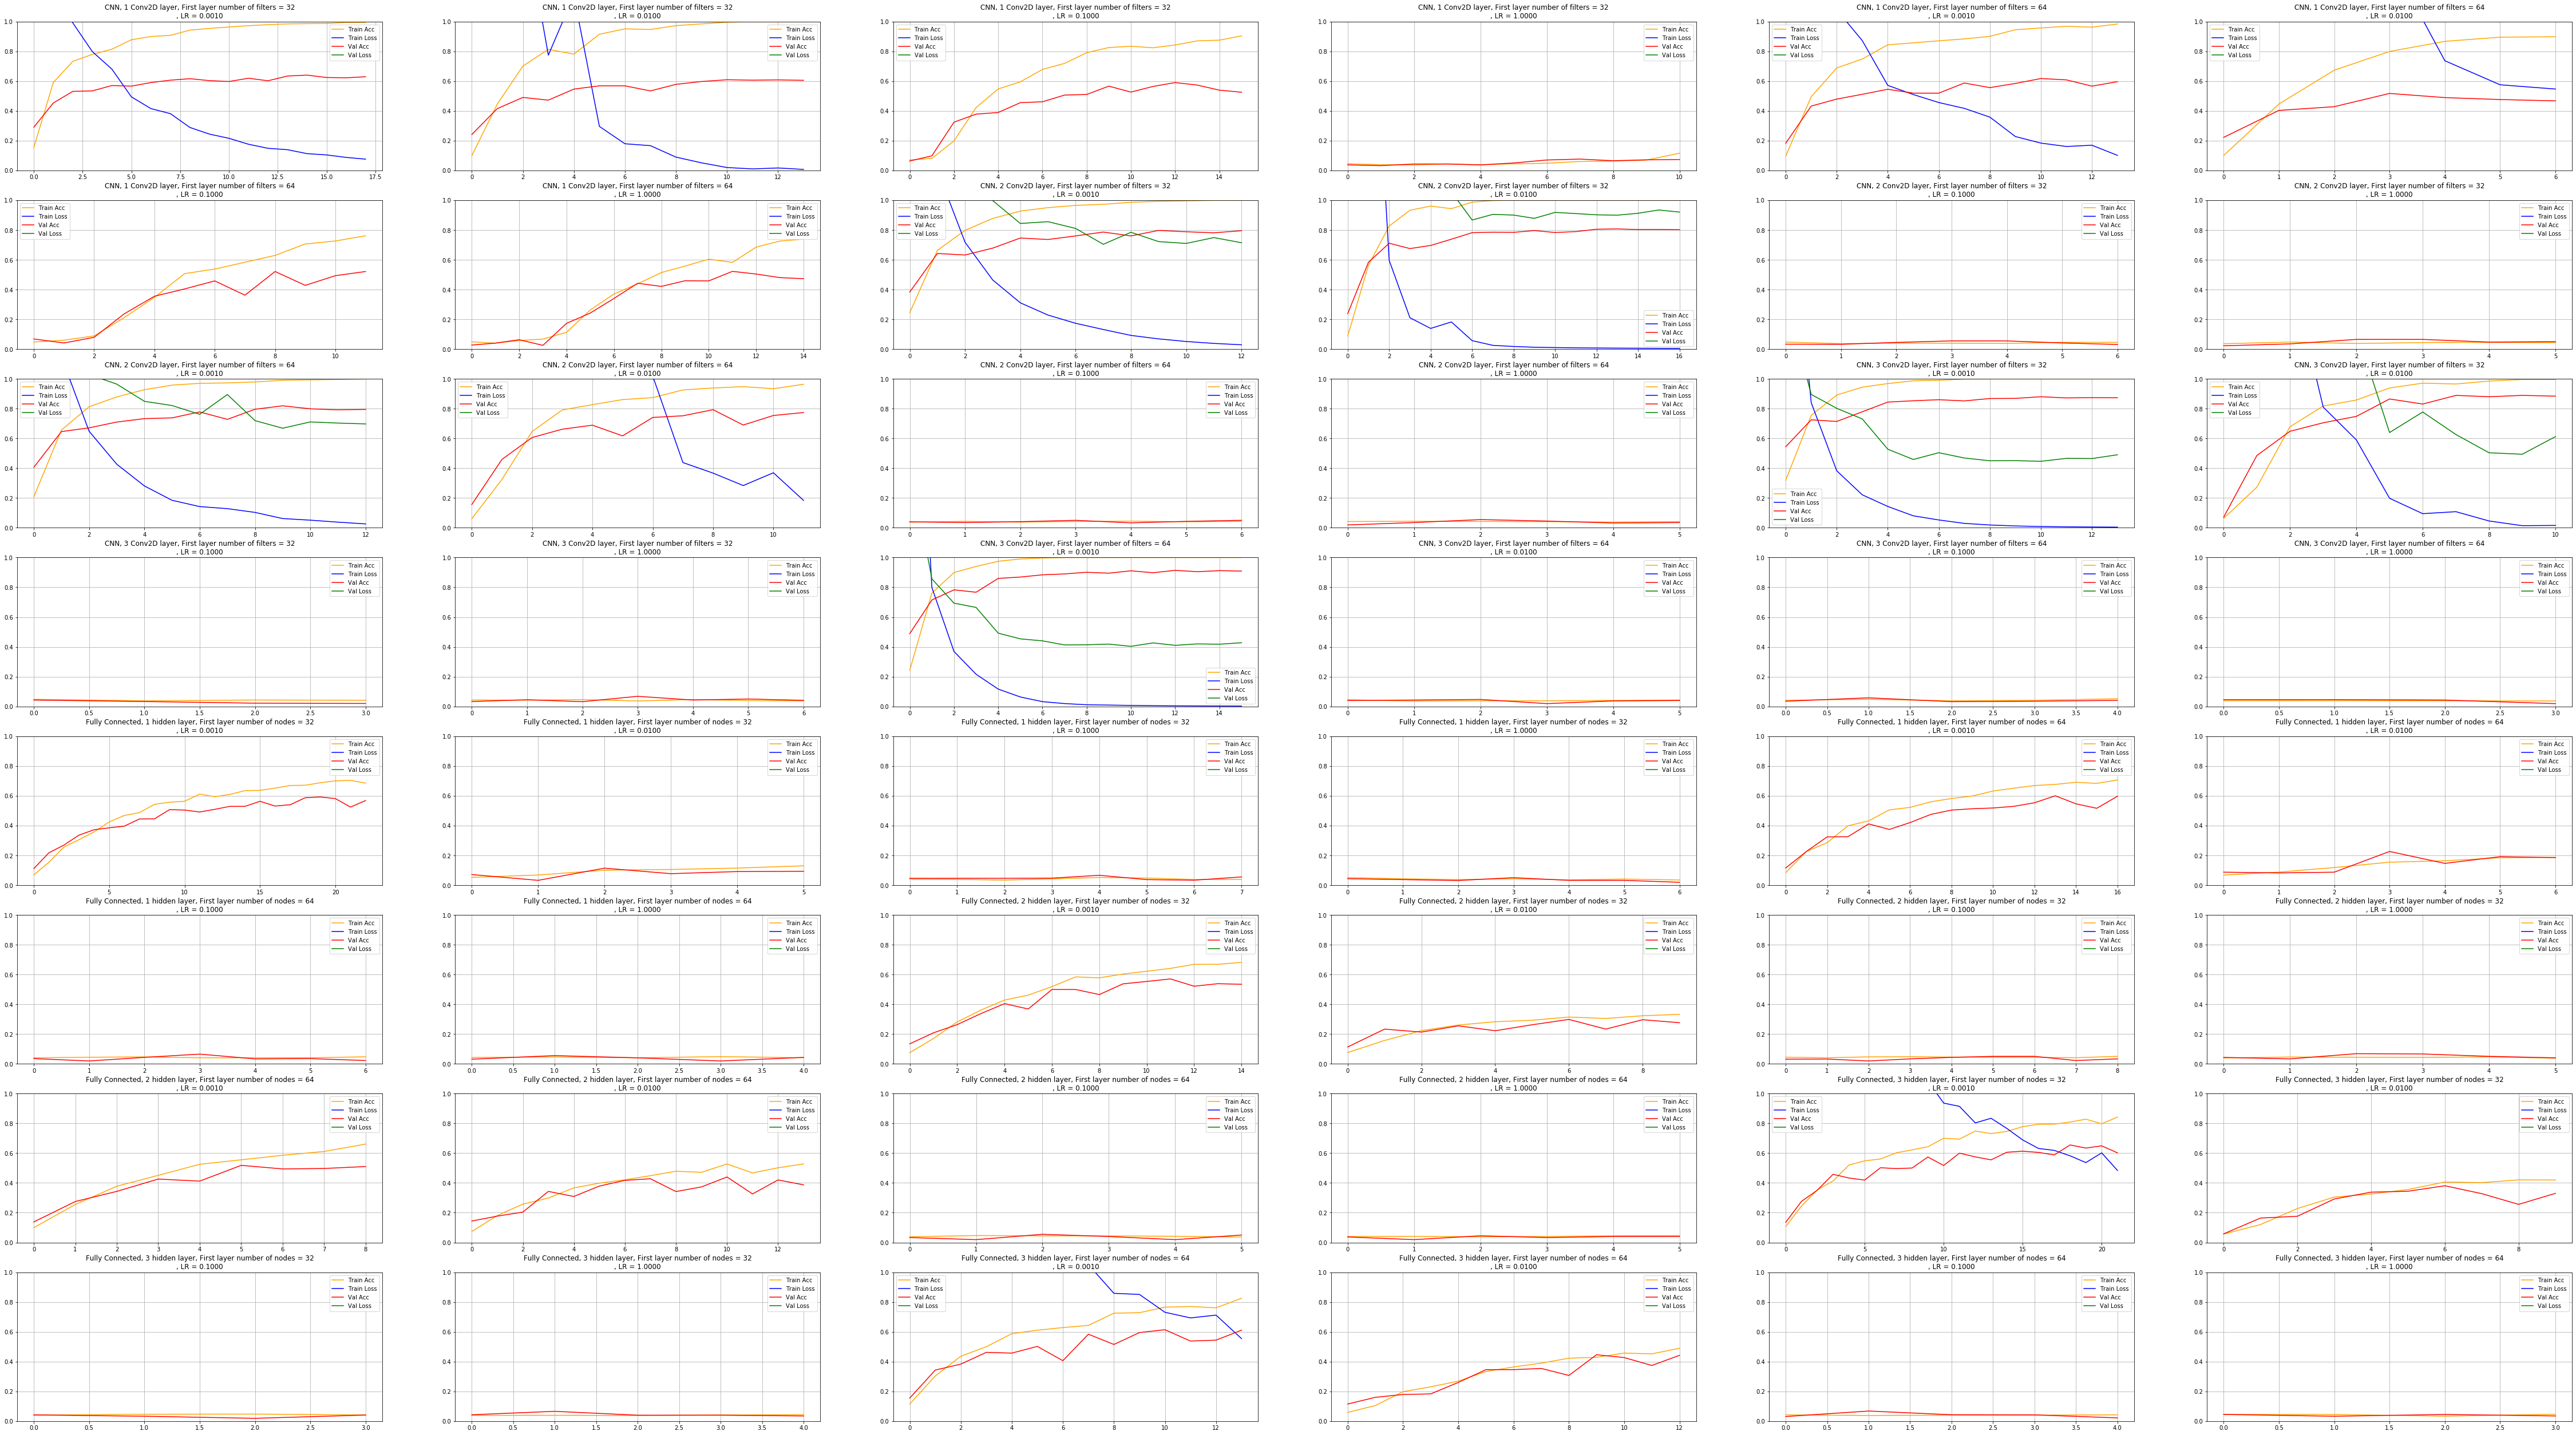

In [51]:
plot_history(history_op, history_op1)

Answer: 

The models that have the highest validation accuracy and test accuracy are represented below:

In [52]:
print ("The CNN model has the highest validation accuracy is model %d " %(np.argmax(val_acc_op)+1) 
       + "with the accuracy of %0.2f" %(max(val_acc_op)*100) + "%")
print ("The Fully Connected model has the highest validation accuracy is model %d " %(np.argmax(val_acc_op1)+25) 
       + "with the accuracy of %0.2f" %(max(val_acc_op1)*100) + "%")
print ("The CNN model has the highest test accuracy is model %d " %(np.argmax(test_acc_op)+1) 
       + "with the accuracy of %0.2f" %(max(test_acc_op)*100) + "%")
print ("The Fully Connected model has the highest test accuracy is model %d " %(np.argmax(test_acc_op1)+25) 
       + "with the accuracy of %0.2f" %(max(test_acc_op1)*100) + "%")

The CNN model has the highest validation accuracy is model 21 with the accuracy of 91.40%
The Fully Connected model has the highest validation accuracy is model 41 with the accuracy of 65.50%
The CNN model has the highest test accuracy is model 21 with the accuracy of 91.90%
The Fully Connected model has the highest test accuracy is model 41 with the accuracy of 65.50%


Answer: From the results and learning curves above, the best model is model 21, with CNN architectures, 3 Conv2D layer, first layer has the number of filters = 64, second layer has the number of filters = 128, third layer has the number of filters = 256 and the learning rate = 0.001. This model has the validation accuracy = 91.40% and test accuracy of 91.90%

### Question 3.4

Once you have performed your systematic optimisation, choose the best network from all of your results.
- Explain why you chose this particular network.
- Were there one or more other networks with very similar performance?  
- If so, did they share particular design features (e.g. size, number of elements, etc)?

Answer: 

From the results and learning curves above, the best model is model 21, with CNN architectures, 3 Conv2D layer, first layer has the number of filters = 64, second layer has the number of filters = 128, third layer has the number of filters = 256 and the learning rate = 0.001. This model has the validation accuracy = 91.40% and test accuracy of 91.90%

There are 2 models that have similar performance: model 17 with Validation accuracy: 88.00%, Test accuracy: 88.70% and model 18 with Validation accuracy: 88.90%, Test accuracy: 88.90%.

The particular design features that both models have is they both have 3 Conv2D layer. The model 21 and model 18 also have the same learning rate = 0.001.

### 3.5 Show Results 
Take the best network and show the confusion matrix for its predictions.

In [35]:
def model_cnn_best(actfn, optimizer):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = 1, activation = actfn, 
                                  padding = "same", kernel_initializer = "he_uniform", input_shape=[28, 28, 1]))
    model.add(keras.layers.MaxPooling2D(pool_size = 2))
    model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), strides = 1, activation = actfn, 
                                              kernel_initializer = "he_uniform", padding = "same"))  
    model.add(keras.layers.MaxPooling2D(pool_size = 2))
    model.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3), strides = 1, activation = actfn, 
                                              kernel_initializer = "he_uniform", padding = "same")) 
    model.add(keras.layers.Flatten())    
    model.add(keras.layers.Dense(24, activation = "softmax")) 
    model.compile(loss="sparse_categorical_crossentropy", optimizer = optimizer(lr = 0.001), metrics=["accuracy"])  
    return model

In [36]:
def do_all_best(actfn, optimizer, n_train, n_valid, n_epochs, batch_size):
    model = model_cnn_best(actfn, optimizer)
    history = model.fit(X_train_model, Y_train_model, batch_size = batch_size, epochs = n_epochs, 
                            callbacks = [early_stopping_cb], validation_data = (X_val_model, Y_val_model))
    max_val_acc = np.max(history.history['val_accuracy'])
    testres = model.evaluate(X_test_model, Y_test_model, verbose = 0)
    return (max_val_acc, testres[1], history, model)

In [37]:
val_acc_best, test_acc_best, history_best, model_best = do_all_best(actfn, optimizer, n_train, n_valid, n_epochs, batch_size)

Train on 2500 samples, validate on 1000 samples
Epoch 1/20
2500/2500 [==============================] - 12s 5ms/sample - loss: 4.2697 - accuracy: 0.2204 - val_loss: 1.9902 - val_accuracy: 0.3620
Epoch 2/20
2500/2500 [==============================] - 12s 5ms/sample - loss: 1.0694 - accuracy: 0.6856 - val_loss: 1.0731 - val_accuracy: 0.6370
Epoch 3/20
2500/2500 [==============================] - 11s 4ms/sample - loss: 0.4867 - accuracy: 0.8488 - val_loss: 0.8963 - val_accuracy: 0.7190
Epoch 4/20
2500/2500 [==============================] - 11s 4ms/sample - loss: 0.2653 - accuracy: 0.9296 - val_loss: 0.7497 - val_accuracy: 0.7560
Epoch 5/20
2500/2500 [==============================] - 11s 4ms/sample - loss: 0.1760 - accuracy: 0.9520 - val_loss: 0.5936 - val_accuracy: 0.8090
Epoch 6/20
2500/2500 [==============================] - 11s 4ms/sample - loss: 0.0934 - accuracy: 0.9864 - val_loss: 0.4816 - val_accuracy: 0.8230
Epoch 7/20
2500/2500 [==============================] - 11s 5ms/sample

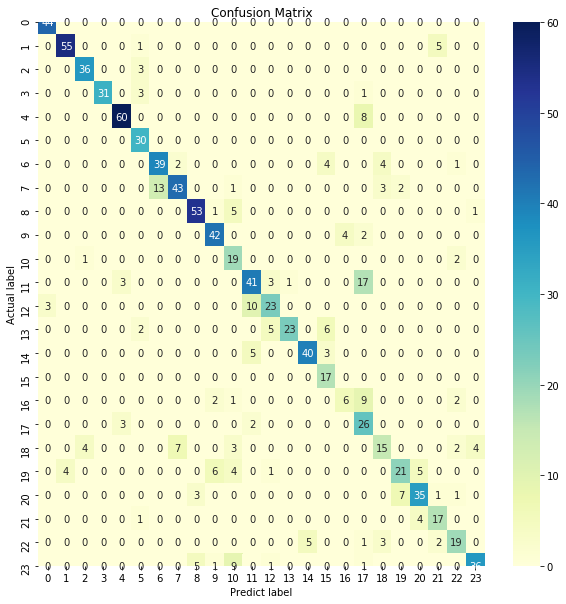

In [40]:
Y_predict_model = model.predict_classes(X_test_model)
matrix = confusion_matrix(Y_test_model,Y_predict_model)
df_matrix = pd.DataFrame(matrix)
plt.figure(figsize = (10,10))
ax = sns.heatmap(df_matrix, annot = True , cmap = "YlGnBu")
ax.set_xlabel("Predict label")
ax.set_ylabel("Actual label")
ax.set_title("Confusion Matrix")
plt.show()

### Question 3.6
 - What class is misclassified the most, and what class is it most typically misclassified as?
 - Give the class numbers and show example images of these.

In [171]:
misclassified = []
for j in range (0,23):
    count = 0
    for i in range (0,1000):
        if (Y_test_model[i] == j and Y_test_model[i] != Y_predict_model[i]):
            count = count + 1
    misclassified.append(count)
print ("The most misclassified class is: %d" %(np.argmax(misclassified)))   

misclassified_as = []
for j in range (0,23):
    if (j != 11):
        count = 0
        for i in range (0,1000):
            if (Y_test_model[i] == 11 and Y_predict_model[i] == j):
                count = count + 1
        misclassified_as.append(count)
    else:
        misclassified_as.append(-1)
print ("The most misclassified class is most typically misclassified as: %d" %(np.argmax(misclassified_as)))

The most misclassified class is: 11
The most misclassified class is most typically misclassified as: 17


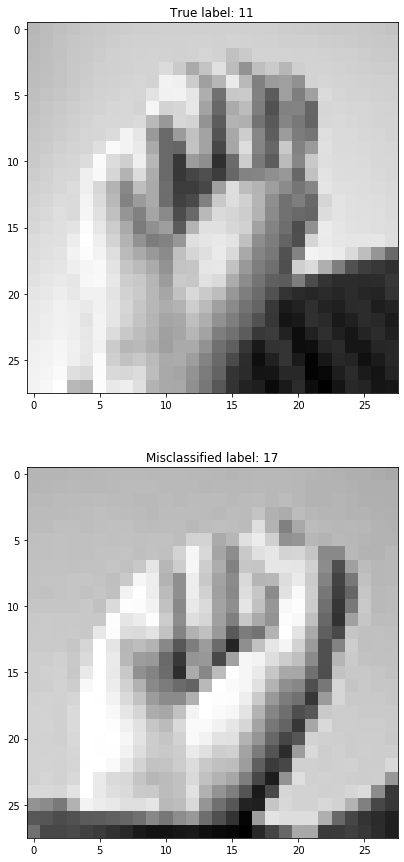

In [185]:
label_ID_test = []

for a in range (0, 1000):
    if (Y_test_model[a] == 11):
        label_ID_test.append(a)
        break
for b in range (0, 1000):
    if (Y_test_model[b] == 17):
        label_ID_test.append(b)
        break

fig, ax = plt.subplots(2,figsize = (20,15))

X_test_model_image = X_test_model.copy()
X_test_model_image = X_test_model_image *255

X_test_model_image_reshape = []
for i in range (0, 1000):
    X_test_model_image_reshape.append(X_test_model_image[i,:].reshape(28,28)) 
    
ax[0].imshow(X_test_model_image_reshape[label_ID_test[0]], cmap = 'gray')
ax[0].grid(False)
ax[0].set_title("True label: 11")
    
ax[1].imshow(X_test_model_image_reshape[label_ID_test[1]], cmap = 'gray')
ax[1].grid(False)
ax[1].set_title("Misclassified label: 17")
    

plt.show()

Answer: From the results above, the most misclassified class is label 11 and it is most typically misclassified as label 17.

### Question 3.7
 - Summarise (in about 2-3 sentences) what you found out about the tuning and model comparisons that you have done in this section.
 - What aspects (if any) do you think might need to be modified for other problems (e.g. those with much larger datasets)? 

Answer: About the tuning and model comparisons:
+ First, tuning the learning rate can increase the performance of the model.
+ Second, the number of layers can affect the performance of the model.

The aspects I think might need to be modified for other problems is:
+ For those with much larger datasets: The number of epochs needed to be reduced.
+ For those with smaller datasets: the number of layers needed to be increased.

***

## 4. Free Choice Element (10%)

In this section you can choose to investigate **just one** of the following options for improving the classification performance. Make sure that you explain your process and show appropriate results. Again, the final results are not that important - it is the process that counts.

Options are:
 - Implement new layers such as Dropout and BatchNormalization (see chapter 11 of Géron)
 - Try alternative and deeper CNN layouts, varying the number of Conv2D and MaxPooling layers and their ordering
 - Investigate the effects of larger networks, as well as changing at least one of the following: optimiser, activation function, batch size and/or training set size
 - Create an Ensemble of different networks and investigate the performance
 - Explore a different style of deep learning network (e.g. ResNet - see chapter 14 of Géron)
 
Report your findings and show the final results.

In [151]:
actfn = 'relu'
optimiser = keras.optimizers.SGD

In [152]:
def model_cnn_free(actfn, optimizer):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = 1, activation = actfn, 
                                  padding = "same", kernel_initializer = "he_uniform", input_shape=[28, 28, 1]))
    model.add(keras.layers.MaxPooling2D(pool_size = 2))
    model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), strides = 1, activation = actfn, 
                                              kernel_initializer = "he_uniform", padding = "same"))
    model.add(keras.layers.MaxPooling2D(pool_size = 2))
    model.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3), strides = 1, activation = actfn, 
                                              kernel_initializer = "he_uniform", padding = "same"))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(24, activation = "softmax")) 
    model.compile(loss="sparse_categorical_crossentropy", optimizer = optimizer(lr = 0.001), metrics=["accuracy"])  
    return model

In [153]:
def do_all_free(actfn, optimizer, n_train, n_valid, n_epochs, batch_size):
    model = model_cnn_free(actfn, optimizer)
    history = model.fit(X_train_model, Y_train_model, batch_size = batch_size, epochs = n_epochs, 
                            callbacks = [early_stopping_cb], validation_data = (X_val_model, Y_val_model))
    max_val_acc = np.max(history.history['val_accuracy'])
    testres = model.evaluate(X_test_model, Y_test_model, verbose = 0)
    return (max_val_acc, testres[1], history, model)

In [154]:
val_acc_free, test_acc_free, history_free, model_free = do_all_free(actfn, optimizer, n_train, n_valid, n_epochs, batch_size)

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - 11s 4ms/sample - loss: 2.9269 - accuracy: 0.1984 - val_loss: 2.0094 - val_accuracy: 0.4360
Epoch 2/100
2500/2500 [==============================] - 10s 4ms/sample - loss: 1.1881 - accuracy: 0.6480 - val_loss: 1.0741 - val_accuracy: 0.6100
Epoch 3/100
2500/2500 [==============================] - 10s 4ms/sample - loss: 0.4817 - accuracy: 0.8368 - val_loss: 0.7163 - val_accuracy: 0.7560
Epoch 4/100
2500/2500 [==============================] - 10s 4ms/sample - loss: 0.2440 - accuracy: 0.9240 - val_loss: 0.7135 - val_accuracy: 0.7800
Epoch 5/100
2500/2500 [==============================] - 10s 4ms/sample - loss: 0.1422 - accuracy: 0.9572 - val_loss: 0.5461 - val_accuracy: 0.8300
Epoch 6/100
2500/2500 [==============================] - 10s 4ms/sample - loss: 0.0994 - accuracy: 0.9700 - val_loss: 0.4760 - val_accuracy: 0.8550
Epoch 7/100
2500/2500 [==============================] - 10s 4ms

In [186]:
print ("The new model has the test accuracy of %0.2f" %(test_acc_free*100) + "%")

The new model has the test accuracy of 92.40%


For this question, I choose to change the optimiser from Adam to SGD and the activation function from elu to relu.

The new model has the test accuracy of 92.40%, higher than the test accuracy of the best model in question 3 - 91.90%

Hence, the changing that I made improve the classification performance of the model.

***